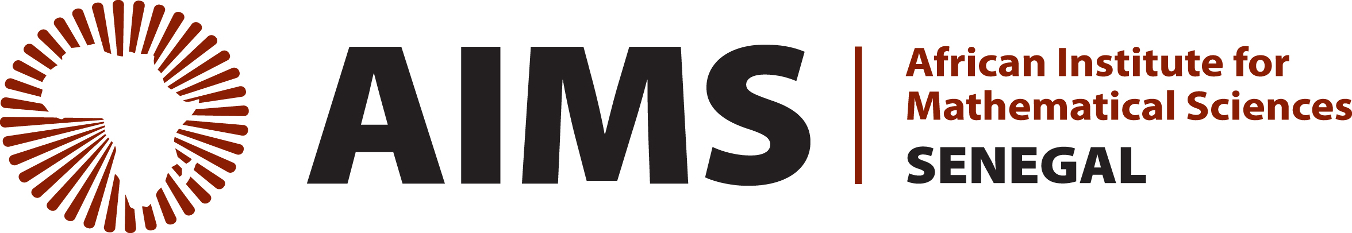

## DEEP LEARNING PROJECT

In [ ]:
GROUP CODE: 

# Introduction
The project focused on classifying diabetic patients from healthy patient from data collection of females consistijng the age range 21 and above using the Pima indian diabetes data with 768 observations against 8 features. After exploratory data analysis and preprocessing we resulted to the application of Artificial Neural Network and afterwards comparing diverse of machine learning algorithm to measure the accuracy over different models.

In [1]:
## standard imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
os.getcwd()

'/home/ike_kobby'

### Reading data into Pandas Dataframe for exploration and analysis

In [98]:
data = pd.read_csv('/home/ike_kobby/Desktop/desk/DL_LEC/data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
data.shape

(768, 9)

In [99]:
### Checking the distribution of the target varibales for the two classes
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [34]:
## Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [35]:
## Checking to see if we have some duplicates in our datasets
data.duplicated()[0],data.duplicated().nunique()

(False, 1)

<Figure size 1200x800 with 0 Axes>

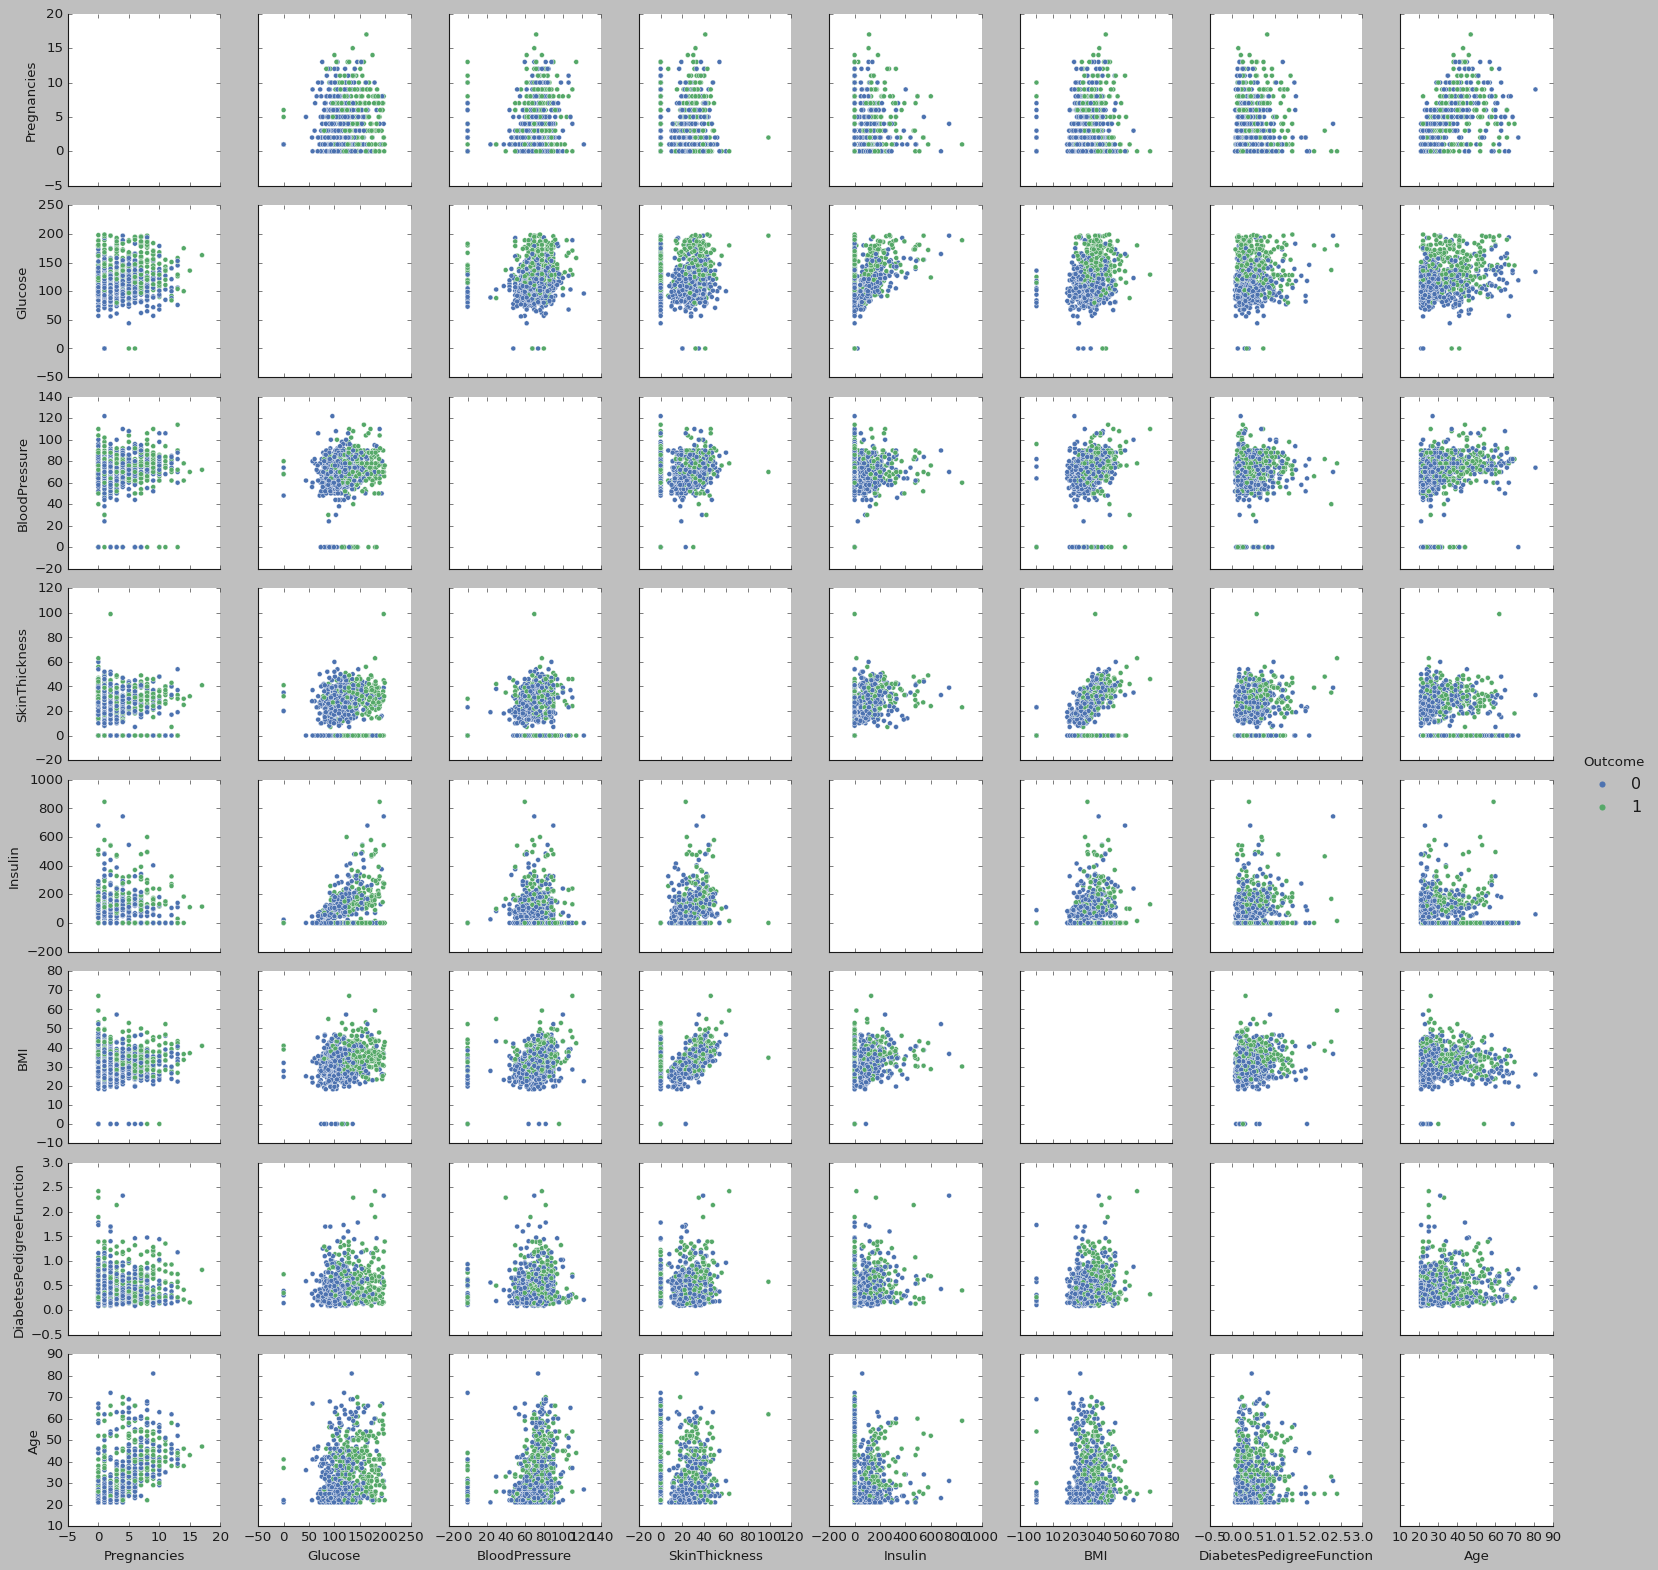

In [36]:
## More on data visualization using seaborn library to see the distribution of the datasets and its relationship
## with the target variables
figure = plt.figure(figsize = (15, 10))
sns.pairplot(data=data,hue='Outcome',diag_kind='scatter')
plt.show()

<AxesSubplot:>

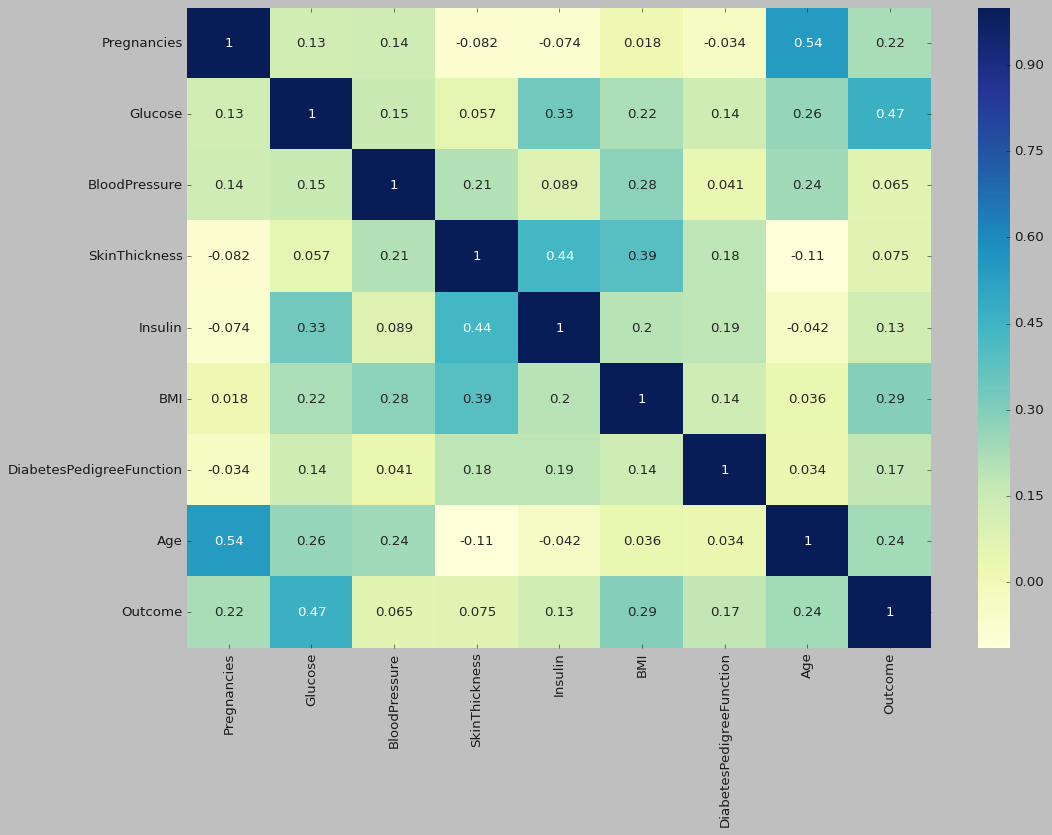

In [37]:
## We check for the correlation of the variables and how they both relate to each other and the target variables

figure = plt.figure(figsize = (15, 10))
sns.heatmap(
    data.corr(),
    annot = True,
    cmap="YlGnBu"
)

- It is seen that the variables do not have strong correlations with each other. Hence they each provide necessary correlation with the target varibale

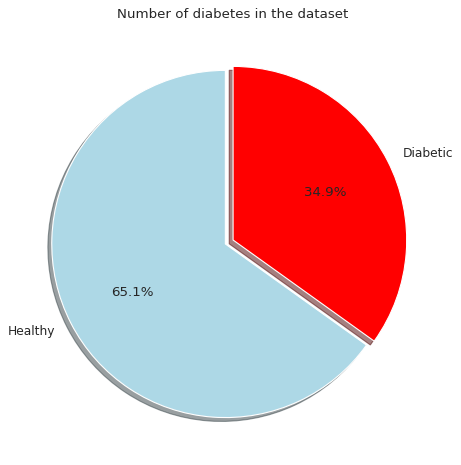

In [38]:
### Pie plot to visualize the distribution of the healthy individuals against the diabetic patients
sns.set(style="whitegrid")
labels = ['Healthy', 'Diabetic']
sizes = data['Outcome'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of diabetes in the dataset')
plt.show()

- Obviously seen by the graphical representation, we have more of healthy records in our datasets than we have for the diabetic patients

### Healthy vs Diabetic by Pregnancy <a id='3.3.1'></a>

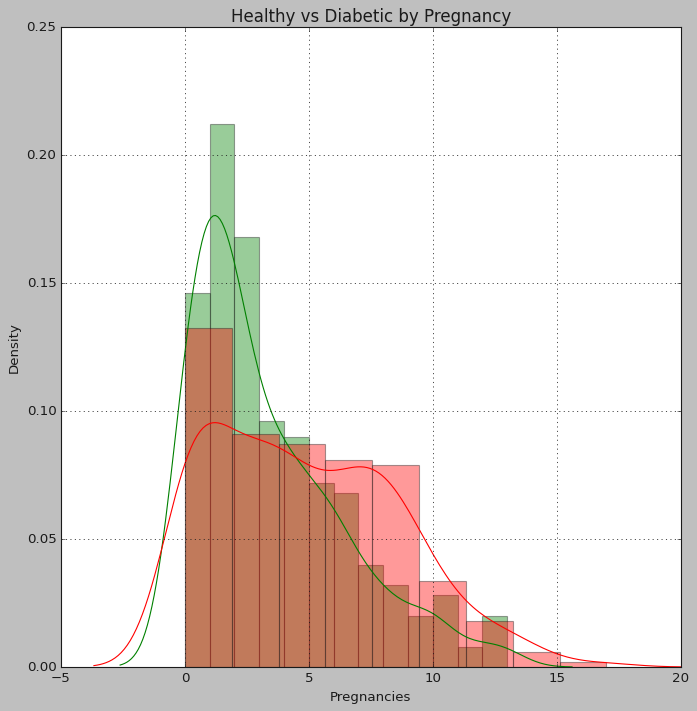

In [39]:
### Variable distribution from the Pregnancy class
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(data[data['Outcome'] == 0]["Pregnancies"], color='green') # Healthy - green
sns.distplot(data[data['Outcome'] == 1]["Pregnancies"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Pregnancy', fontsize=15)
plt.xlim([-5,20])
plt.grid(linewidth = 0.7)
plt.show()

- It can be deduced from the distribution plot that within the pregnancy variable is likely not a cause for diabetes since the distribution is almost same for healthy and diabetic

### Healthy vs Diabetic by Glucose <a id='3.3.2'></a>

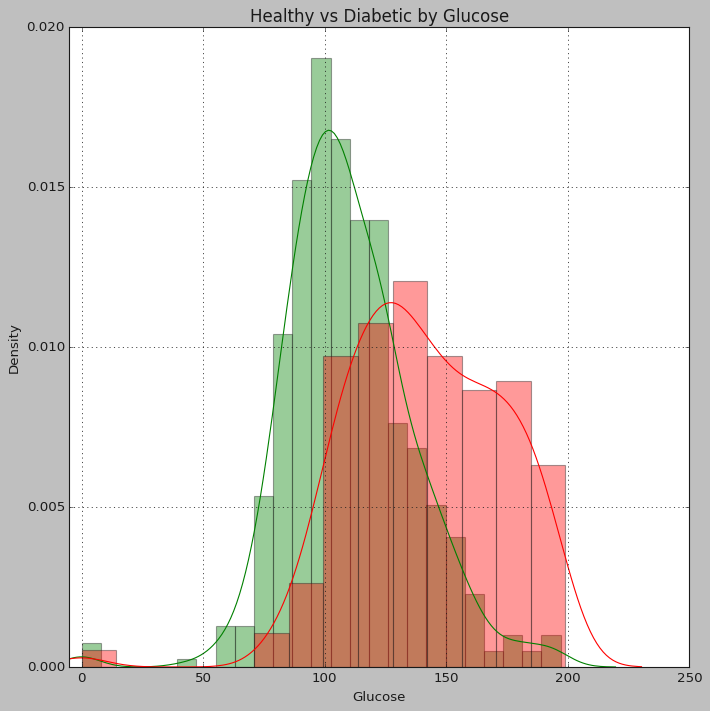

In [40]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(data[data['Outcome'] == 0]["Glucose"], color='green') # Healthy - green
sns.distplot(data[data['Outcome'] == 1]["Glucose"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Glucose', fontsize=15)
plt.xlim([-5,250])
plt.grid(linewidth = 0.7)
plt.show()

 - It shown from the distribution that healthy individual usually have blood glucose close to the 100mg/dl and as that drops into the diabetic region, it describes the susceptibleness of the contraction. 

### Healthy vs Diabetic by Blood Pressure <a id='3.3.3'></a>

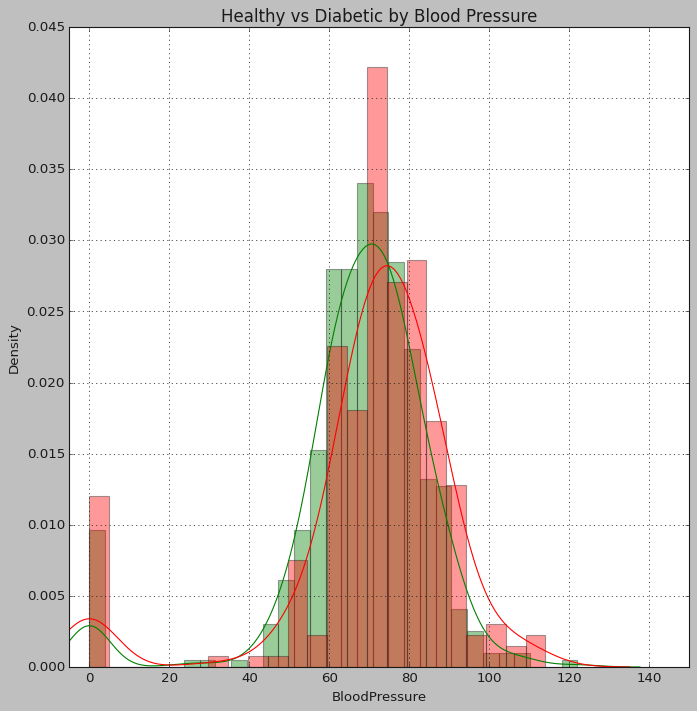

In [41]:
## Diabetic by blood pressure 
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(data[data['Outcome'] == 0]["BloodPressure"], color='green') # Healthy - green
sns.distplot(data[data['Outcome'] == 1]["BloodPressure"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.show()

- It can be deduced here that healthy individual wiht blodd pressure only a few.

In [42]:
X = data.drop('Outcome', axis = 'columns')
y = data.Outcome

X.shape, y.shape

((768, 8), (768,))

In [43]:
from sklearn.model_selection import train_test_split
def split(X,y):
    a, b, c, d  = train_test_split(X, y, test_size = 0.2, random_state = 1)
    return a, b, c, d

In [44]:
X_train, X_test, y_train, y_test = split(X,y)

In [28]:
X_train.shape, y_train.shape

((614, 8), (614,))

## Preprocessing and feature selection

In [46]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.04801191, 0.13633859, 0.        , 0.01027546, 0.03622869,
       0.0960228 , 0.02375112, 0.02724949])

In [47]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Glucose                     0.136339
BMI                         0.096023
Pregnancies                 0.048012
Insulin                     0.036229
Age                         0.027249
DiabetesPedigreeFunction    0.023751
SkinThickness               0.010275
BloodPressure               0.000000
dtype: float64

In [48]:
X_train.drop('BloodPressure', axis = 1, inplace = True)
X_test.drop('BloodPressure', axis =1, inplace = True)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:>

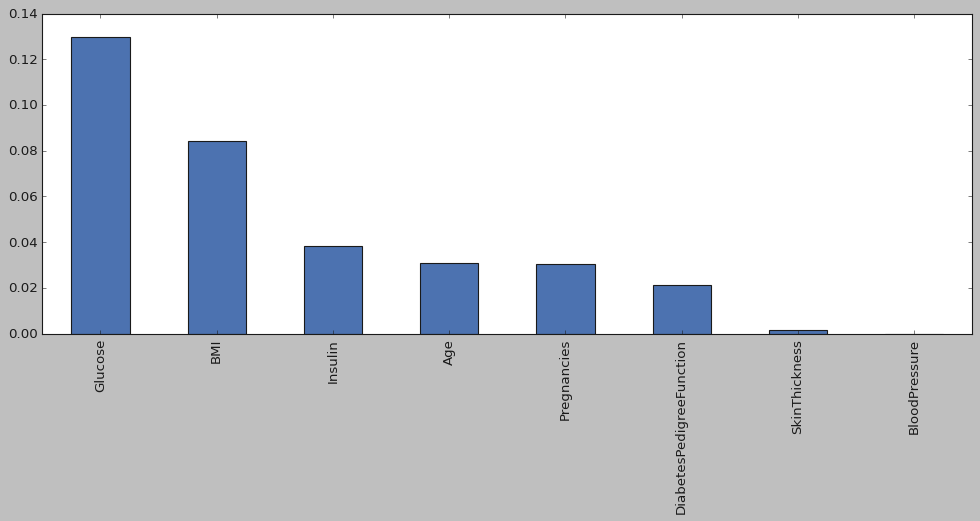

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [55]:
import tensorflow as tf
from tensorflow import keras

### Fitting data without any preprocessing 

In [92]:
model = keras.Sequential([
                          keras.layers.Dense(units = 30, activation='relu', kernel_initializer='he_uniform', input_shape=(7,)),
                          keras.layers.Dense(units = 30, activation = 'relu', kernel_initializer='he_uniform'),
                          keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                240       
_________________________________________________________________
dense_25 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 31        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [124]:
model_history_ = model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 0s 21ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 2.0867 - val_accuracy: 0.7078
Epoch 2/50
20/20 [==============================] - 0s 19ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 2.1023 - val_accuracy: 0.7143
Epoch 3/50
20/20 [==============================] - 0s 20ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0921 - val_accuracy: 0.7143
Epoch 4/50
20/20 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 2.0929 - val_accuracy: 0.7078
Epoch 5/50
20/20 [==============================] - 0s 20ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0990 - val_accuracy: 0.7143
Epoch 6/50
20/20 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.1069 - val_accuracy: 0.7143
Epoch 7/50
20/20 [==============================] - 0s 18ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 2.0823 - val_accuracy: 0.7143
Epoch 8/50
20

In [125]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 23ms/step - loss: 2.2048 - accuracy: 0.7143


[2.2047929763793945, 0.7142857313156128]

In [126]:
model.evaluate(X_test,y_test)
model_preds = np.round(model.predict(X_test))
print(confusion_matrix(y_test,model_preds))
print(classification_report(y_test, model_preds))

5/5 [==============================] - 0s 14ms/step - loss: 2.2048 - accuracy: 0.7143
[[79 20]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        99
           1       0.61      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


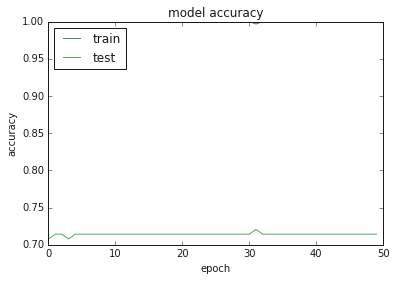

In [127]:
print(model_history_.history.keys())
plt.plot(model_history_.history['accuracy'])
plt.plot(model_history_.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

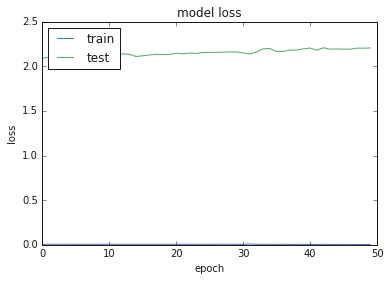

In [128]:
plt.plot(model_history_.history['loss'])
plt.plot(model_history_.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Fitting data after preprocessing with standard scaler.

In [129]:
clf = keras.Sequential([
    keras.layers.Dense(units = 100, kernel_initializer = 'he_uniform',activation='relu',input_shape = (7,)),
    keras.layers.Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'),
    keras.layers.Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')
])

clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=clf.fit(X_train, y_train,validation_split=0.2, epochs = 50)

Epoch 1/50
16/16 [==============================] - 1s 36ms/step - loss: 0.6923 - accuracy: 0.6318 - val_loss: 0.4937 - val_accuracy: 0.7642
Epoch 2/50
16/16 [==============================] - 0s 23ms/step - loss: 0.5093 - accuracy: 0.7593 - val_loss: 0.4660 - val_accuracy: 0.7642
Epoch 3/50
16/16 [==============================] - 0s 21ms/step - loss: 0.4571 - accuracy: 0.7937 - val_loss: 0.4667 - val_accuracy: 0.7724
Epoch 4/50
16/16 [==============================] - 0s 29ms/step - loss: 0.4676 - accuracy: 0.7707 - val_loss: 0.4750 - val_accuracy: 0.7480
Epoch 5/50
16/16 [==============================] - 0s 29ms/step - loss: 0.4803 - accuracy: 0.7658 - val_loss: 0.4720 - val_accuracy: 0.7561
Epoch 6/50
16/16 [==============================] - 0s 26ms/step - loss: 0.4671 - accuracy: 0.7837 - val_loss: 0.4709 - val_accuracy: 0.7724
Epoch 7/50
16/16 [==============================] - 1s 48ms/step - loss: 0.4425 - accuracy: 0.7833 - val_loss: 0.4710 - val_accuracy: 0.7561
Epoch 8/50
16

In [130]:
clf.evaluate(X_test, y_test)

5/5 [==============================] - 0s 18ms/step - loss: 0.5141 - accuracy: 0.7922


[0.5140772461891174, 0.7922077775001526]

In [131]:
clf.evaluate(X_test,y_test)
clf_preds = np.round(clf.predict(X_test))
print(confusion_matrix(y_test,clf_preds))
print(classification_report(y_test, clf_preds))

5/5 [==============================] - 0s 30ms/step - loss: 0.5141 - accuracy: 0.7922
[[83 16]
 [16 39]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


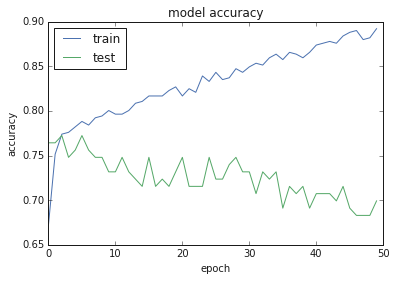

In [132]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

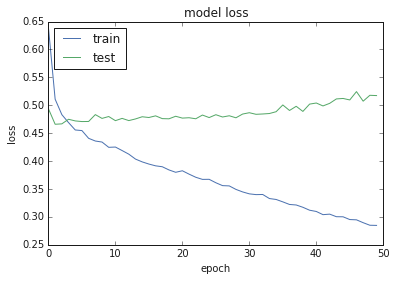

In [133]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Using layers with Dropout method to curb overfitting issues

In [119]:
clf_1 = keras.Sequential([
    keras.layers.Dense(units = 100, kernel_initializer = 'he_uniform',activation='relu',input_shape = (7,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')
])

clf_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history_1=clf_1.fit(X_train, y_train,validation_split=0.2, batch_size = 10, epochs = 30)

Epoch 1/30
50/50 [==============================] - 1s 17ms/step - loss: 0.7370 - accuracy: 0.6413 - val_loss: 0.4702 - val_accuracy: 0.7561
Epoch 2/30
50/50 [==============================] - 1s 12ms/step - loss: 0.5681 - accuracy: 0.7308 - val_loss: 0.4751 - val_accuracy: 0.7317
Epoch 3/30
50/50 [==============================] - 1s 14ms/step - loss: 0.5009 - accuracy: 0.7787 - val_loss: 0.4828 - val_accuracy: 0.7561
Epoch 4/30
50/50 [==============================] - 1s 12ms/step - loss: 0.4813 - accuracy: 0.7750 - val_loss: 0.4777 - val_accuracy: 0.7642
Epoch 5/30
50/50 [==============================] - 1s 14ms/step - loss: 0.5275 - accuracy: 0.7434 - val_loss: 0.4839 - val_accuracy: 0.7561
Epoch 6/30
50/50 [==============================] - 1s 10ms/step - loss: 0.5386 - accuracy: 0.7296 - val_loss: 0.4760 - val_accuracy: 0.7642
Epoch 7/30
50/50 [==============================] - 1s 13ms/step - loss: 0.5247 - accuracy: 0.7203 - val_loss: 0.4682 - val_accuracy: 0.7398
Epoch 8/30
50

In [120]:
clf_1.evaluate(X_test, y_test)

5/5 [==============================] - 0s 19ms/step - loss: 0.4858 - accuracy: 0.8117


[0.48583582043647766, 0.8116883039474487]

In [121]:
clf_1.evaluate(X_test,y_test)
clf_1_preds = np.round(clf_1.predict(X_test))
print(confusion_matrix(y_test,clf_1_preds))
print(classification_report(y_test, clf_1_preds))

5/5 [==============================] - 0s 15ms/step - loss: 0.4858 - accuracy: 0.8117
[[85 14]
 [15 40]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        99
           1       0.74      0.73      0.73        55

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


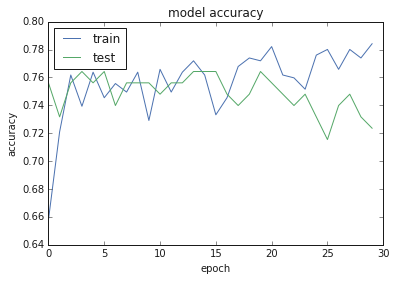

In [122]:
print(model_history.history.keys())
plt.plot(model_history_1.history['accuracy'])
plt.plot(model_history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

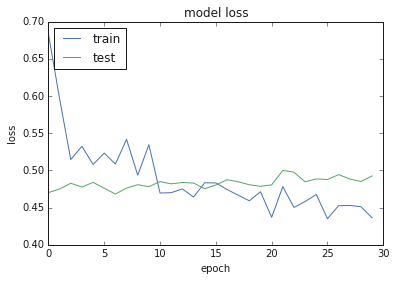

In [123]:
plt.plot(model_history_1.history['loss'])
plt.plot(model_history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Machine learning algorithms comparison

In [95]:
import pycaret

In [23]:
df = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(df.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (768, 9)
Unseen Data For Predictions: (77, 9)


In [25]:
from pycaret.classification import *
clf_setup = setup(data = data, target = 'Outcome',imputation_type='iterative',feature_selection = True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7470,0.8159,0.6556,0.6240,0.6346,0.4422,0.4468,0.165
rf,Random Forest Classifier,0.7469,0.8024,0.6222,0.6324,0.6191,0.4313,0.4379,0.528
lightgbm,Light Gradient Boosting Machine,0.7414,0.8061,0.6389,0.6148,0.6211,0.4260,0.4312,0.123
ada,Ada Boost Classifier,0.7376,0.8085,0.6500,0.5980,0.6180,0.4196,0.4247,0.130
ridge,Ridge Classifier,0.7283,0.0000,0.6778,0.5937,0.6272,0.4168,0.4242,0.026
et,Extra Trees Classifier,0.7283,0.7724,0.4944,0.6305,0.5424,0.3561,0.3686,0.475
lda,Linear Discriminant Analysis,0.7246,0.7949,0.6722,0.5885,0.6222,0.4088,0.4157,0.028
lr,Logistic Regression,0.7190,0.8043,0.6722,0.5797,0.6172,0.3990,0.4062,0.523
dt,Decision Tree Classifier,0.7003,0.6728,0.5889,0.5550,0.5693,0.3406,0.3426,0.029
knn,K Neighbors Classifier,0.6854,0.7230,0.6833,0.5249,0.5926,0.3440,0.3529,0.127


In [27]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)